# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who:
   - have a **low total_claim_amount** (e.g., below $1,000),
   - have a response "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [2]:
# your code goes here
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

file_path = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv"

df = pd.read_csv(file_path)
df
# df.info()
# df.dtypes
# df.nunique()
# df.describe()
# display(df.isna().sum())
# display((df.isna().sum()/df.shape[0])*100)
# df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [14]:
df.nunique()

Unnamed: 0                       10910
Customer                          9134
State                                5
Customer Lifetime Value           8041
Response                             2
Coverage                             3
Education                            5
Effective To Date                   59
EmploymentStatus                     5
Gender                               2
Income                            5694
Location Code                        3
Marital Status                       3
Monthly Premium Auto               202
Months Since Last Claim             36
Months Since Policy Inception      100
Number of Open Complaints            6
Number of Policies                   9
Policy Type                          3
Policy                               9
Renew Offer Type                     4
Sales Channel                        4
Total Claim Amount                5106
Vehicle Class                        6
Vehicle Size                         3
Vehicle Type             

In [4]:
df.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [5]:
df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
# DataFrame for customers with low total claim and "Yes" response
# Filter for total claim amount < 1000 and Response == "Yes"
filtered_df = df[(df["Total Claim Amount"] < 1000) & (df["Response"] == "Yes")]
display(filtered_df.describe())

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,1399.000000,1399.000000,1399.000000,1399.000000,1324.000000,1399.000000,1324.000000,1399.000000,1399.000000
mean,5369.293066,7709.166530,38483.350250,88.720515,14.640483,47.423159,0.364048,2.894210,412.134087
std,3138.693825,6261.525485,28191.664861,22.642518,9.781315,26.797704,0.927667,2.424591,180.460971
min,3.000000,2004.350666,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,7.345946
25%,2627.000000,3936.410182,18495.000000,67.000000,6.000000,25.000000,0.000000,1.000000,312.000000
50%,5423.000000,5548.031892,33190.000000,84.000000,14.000000,50.000000,0.000000,2.000000,398.502948
75%,7933.500000,9031.214859,60920.000000,107.000000,22.000000,68.000000,0.000000,3.000000,528.200860
max,10897.000000,41787.903430,99845.000000,154.000000,35.000000,99.000000,5.000000,9.000000,960.115399


In [7]:
# Subset for customers who responded "Yes"
yes_df = df[df["Response"] == "Yes"]

# Group by Policy Type and Gender, calculate means
agg_results = yes_df.groupby(["Policy Type", "Gender"]).agg({
    "Monthly Premium Auto": "mean",
    "Customer Lifetime Value": "mean",
    "Total Claim Amount": "mean"
}).reset_index()

display(agg_results)

# Optional: Compare claim amount patterns
pivot_claims = yes_df.pivot_table(index=["Policy Type", "Gender"], values="Total Claim Amount", aggfunc=["mean", "median", "min", "max"])
display(pivot_claims)

# Discussion:
# - Segments with higher average lifetime value and lower claim amounts are most profitable/low-risk.

,Policy Type,Gender,Monthly Premium Auto,Customer Lifetime Value,Total Claim Amount
0,Corporate Auto,F,94.301775,7712.628736,433.738499
1,Corporate Auto,M,92.188312,7944.465414,408.582459
2,Personal Auto,F,98.998148,8339.791842,452.965929
3,Personal Auto,M,91.085821,7448.383281,457.010178
4,Special Auto,F,92.314286,7691.584111,453.280164
5,Special Auto,M,86.343750,8247.088702,429.527942


mean             median  \
                      Total Claim Amount Total Claim Amount   
Policy Type    Gender                                         
Corporate Auto F              433.738499         420.041981   
               M              408.582459         364.800000   
Personal Auto  F              452.965929         424.330166   
               M              457.010178         412.800000   
Special Auto   F              453.280164         420.041981   
               M              429.527942         345.600000   

                                     min                max  
                      Total Claim Amount Total Claim Amount  
Policy Type    Gender                                        
Corporate Auto F                7.345946        1358.400000  
               M               57.712985        1324.800000  
Personal Auto  F                7.345946        1358.400000  
               M               57.712985        1324.800000  
Special Auto   F               56.603330        1358.400000  
               M               86.461582        1027.000029

In [8]:
# Number of policies per state, only states with >500 customers
# Count policies by state
state_counts = df["State"].value_counts()
display(state_counts)
print('---------------------------')
states_over_500 = state_counts[state_counts > 500]
display(states_over_500)
print('---------------------------')
# Optionally, show filtered DataFrame
# df_states_500 = df[df["State"].isin(states_over_500.index)]
# display(df_states_500["State"].value_counts())

State
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64

---------------------------


State
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64

---------------------------


In [9]:
clv_stats = df.groupby(["Education", "Gender"])["Customer Lifetime Value"].agg(["max", "min", "median"]).reset_index()
display(clv_stats)

# Conclusion:
# - "Bachelor" educated females have the highest max CLV.
# - The median CLV is generally higher for females across most education levels, indicating better long-term value.
# - Segments with high median and low minimum CLV can be targeted for premium policies.

,Education,Gender,max,min,median
0,Bachelor,F,73225.95652,1904.000852,5640.505303
1,Bachelor,M,67907.27050,1898.007675,5548.031892
2,College,F,61850.18803,1898.683686,5623.611187
3,College,M,61134.68307,1918.119700,6005.847375
4,Doctor,F,44856.11397,2395.570000,5332.462694
5,Doctor,M,32677.34284,2267.604038,5577.669457
6,High School or Below,F,55277.44589,2144.921535,6039.553187
7,High School or Below,M,83325.38119,1940.981221,6286.731006
8,Master,F,51016.06704,2417.777032,5729.855012
9,Master,M,50568.25912,2272.307310,5579.099207


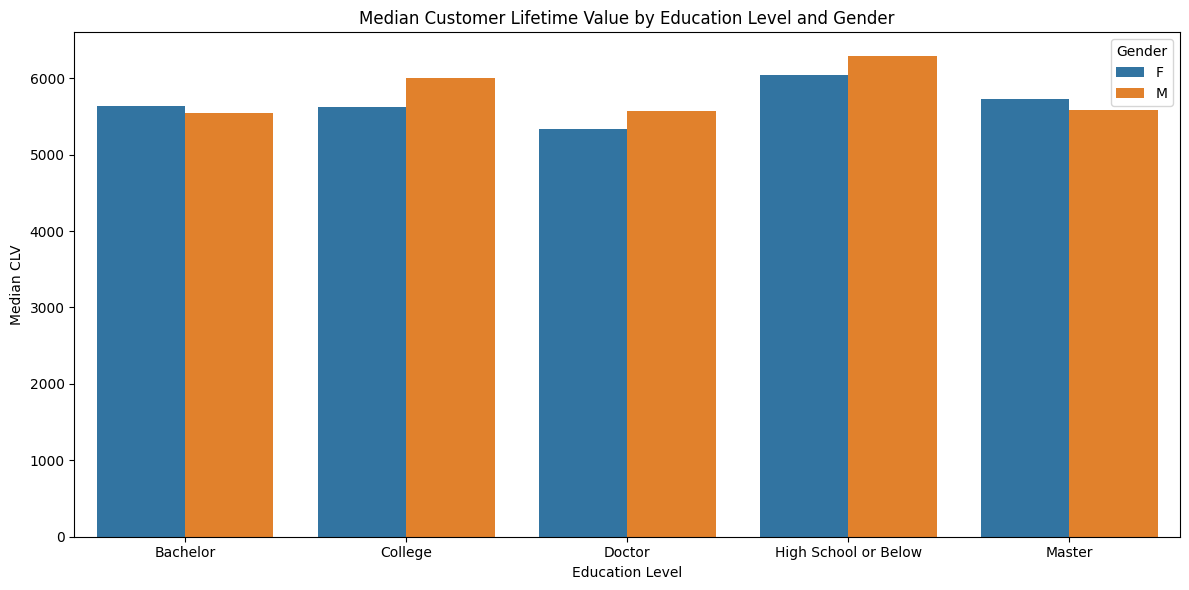

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="Education", y="median", hue="Gender", data=clv_stats)
plt.title('Median Customer Lifetime Value by Education Level and Gender')
plt.ylabel('Median CLV')
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()

In [19]:
# Policies Sold by State and Month (Pivot Table)
# Ensure Effective To Date is datetime type
df["Effective To Date"] = pd.to_datetime(df["Effective To Date"], format="%d %m %Y", errors='coerce')
df["Month"] = df["Effective To Date"].dt.month_name()

# Group by State and Month, count number of policies sold
policies_by_state_month = df.groupby(["State", "Month"])["Policy"].count().reset_index()
# display(policies_by_state_month)

# Pivot: States as rows, Months as columns, values = number of policies
pivot_table = policies_by_state_month.pivot(index="State", columns="Month", values="Policy").fillna(0)
display(pivot_table)

Month,February,January
State,,
Arizona,929,1008
California,1634,1918
Nevada,442,551
Oregon,1344,1565
Washington,425,463


In [18]:
# Policies Sold by Month for Top 3 States
# Total policies sold by state
state_totals = df.groupby("State")["Policy"].count().sort_values(ascending=False)
top_3_states = state_totals.head(3).index
# display(top_3_states)

# Filter original group for only top 3 states
top3_policies = policies_by_state_month[policies_by_state_month["State"].isin(top_3_states)]
# display(top3_policies )

# Pivot for top 3 states only
top3_pivot = top3_policies.pivot(index="State", columns="Month", values="Policy").fillna(0)
display(top3_pivot)

Month,February,January
State,,
Arizona,929,1008
California,1634,1918
Oregon,1344,1565


In [21]:
# Customer Response Rate by Marketing Channel
# Calculate response rate (Yes) by Sales Channel
response_rate = df.groupby("Sales Channel")["Response"].value_counts(normalize=True).unstack().fillna(0)
response_rate_yes = response_rate.get("Yes", pd.Series())
response_rate_yes = response_rate_yes.reset_index().rename(columns={ "Yes": "Response Rate Yes" })

display(response_rate_yes)

# Or, melt for visualization
# melted = df[df["Response"] == "Yes"].groupby("Sales Channel").size().reset_index(name="Yes Responses")
# total_by_channel = df.groupby("Sales Channel").size().reset_index(name="Total")
# merged = pd.merge(melted, total_by_channel, on="Sales Channel")
# merged["Response Rate Yes"] = merged["Yes Responses"] / merged["Total"]

# display(merged[["Sales Channel", "Response Rate Yes"]])

,Sales Channel,Response Rate Yes
0,Agent,0.190746
1,Branch,0.113787
2,Call Center,0.109786
3,Web,0.117141


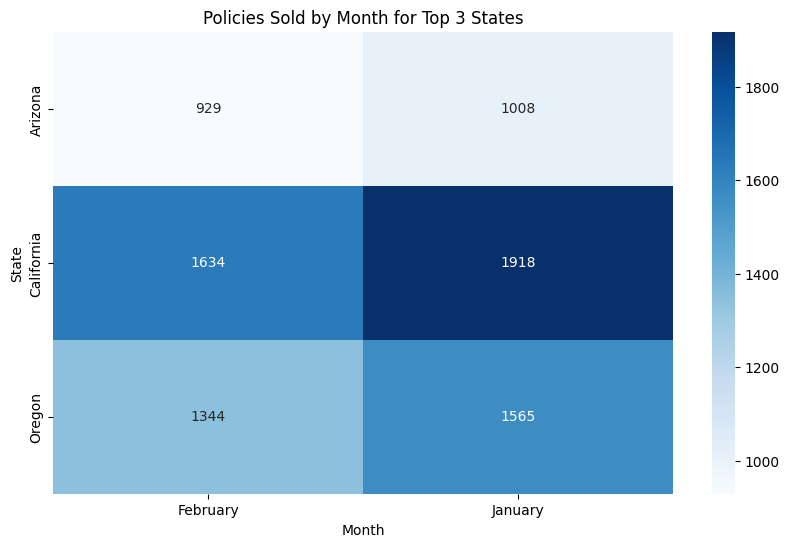

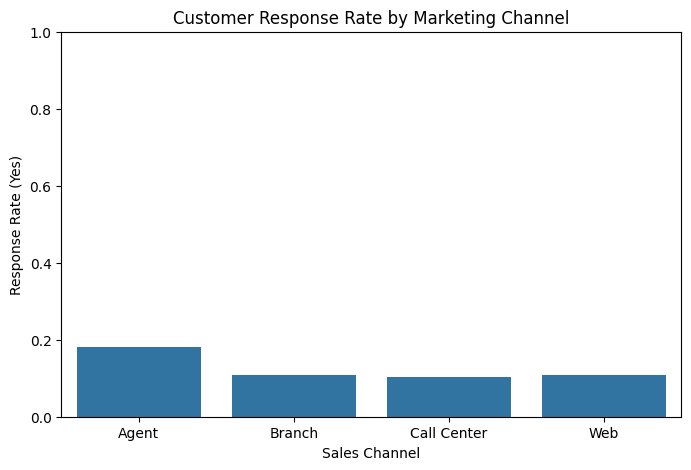

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(top3_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Policies Sold by Month for Top 3 States")
plt.ylabel("State")
plt.xlabel("Month")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Sales Channel", y="Response Rate Yes", data=merged)
plt.title("Customer Response Rate by Marketing Channel")
plt.ylabel("Response Rate (Yes)")
plt.xlabel("Sales Channel")
plt.ylim(0,1)
plt.show()